<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(2_4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,97.990320,59.879411,94.320386,85.419124,-174.637653,172.971588,242.702623,-69.731035
1,0.0,1.0,21.153710,31.248300,65.353846,46.768222,31.326562,205.850641,196.729399,9.121242
2,0.0,2.0,81.025500,49.606865,33.503240,79.307528,152.171638,405.614771,270.475269,135.139502
3,0.0,3.0,47.331598,45.594654,97.992064,94.828448,-101.769722,193.977042,219.491371,-25.514329
4,0.0,4.0,66.913209,42.824273,52.038532,88.803535,-174.433452,86.146098,259.629951,-173.483853
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,32.130826,72.041991,44.701315,98.323779,27.444716,284.642627,375.562453,-90.919826
59996,999.0,56.0,73.054735,72.689819,44.165008,47.729931,-95.353858,152.285636,220.453115,-68.167478
59997,999.0,57.0,41.335377,51.750127,28.223104,85.835457,-144.531883,72.612181,285.344825,-212.732644
59998,999.0,58.0,85.007718,31.482756,53.366748,29.403743,-52.393790,156.867175,126.502341,30.364835


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    97.990320  59.879411  94.320386  85.419124 -174.637653   
      1.0    21.153710  31.248300  65.353846  46.768222   31.326562   
      2.0    81.025500  49.606865  33.503240  79.307528  152.171638   
      3.0    47.331598  45.594654  97.992064  94.828448 -101.769722   
      4.0    66.913209  42.824273  52.038532  88.803535 -174.433452   
...                ...        ...        ...        ...         ...   
999.0 55.0   32.130826  72.041991  44.701315  98.323779   27.444716   
      56.0   73.054735  72.689819  44.165008  47.729931  -95.353858   
      57.0   41.335377  51.750127  28.223104  85.835457 -144.531883   
      58.0   85.007718  31.482756  53.366748  29.403743  -52.393790   
      59.0   86.544320  36.372702  90.016584  56.919971  124.611145   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    172.971588  242.702623  -69.731035  
      1.0    205.850641  196.729399    9.121242  
      2.0    405.614771  270.475269  135.139502  
      3.0    193.977042  219.491371  -25.514329  
      4.0     86.146098  259.629951 -173.483853  
...                 ...         ...         ...  
999.0 55.0   284.642627  375.562453  -90.919826  
      56.0   152.285636  220.453115  -68.167478  
      57.0    72.612181  285.344825 -212.732644  
      58.0   156.867175  126.502341   30.364835  
      59.0   404.464722  278.392228  126.072494  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    97.990320  59.879411  94.320386  85.419124 -174.637653   
      1.0    21.153710  31.248300  65.353846  46.768222   31.326562   
      2.0    81.025500  49.606865  33.503240  79.307528  152.171638   
      3.0    47.331598  45.594654  97.992064  94.828448 -101.769722   
      4.0    66.913209  42.824273  52.038532  88.803535 -174.433452   
...                ...        ...        ...        ...         ...   
999.0 55.0   32.130826  72.041991  44.701315  98.323779   27.444716   
      56.0   73.054735  72.689819  44.165008  47.729931  -95.353858   
      57.0   41.335377  51.750127  28.223104  85.835457 -144.531883   
      58.0   85.007718  31.482756  53.366748  29.403743  -52.393790   
      59.0   86.544320  36.372702  90.016584  56.919971  124.611145   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    172.971588  242.702623  -69.731035  
      1.0    205.850641  196.729399    9.121242  
      2.0    405.614771  270.475269  135.139502  
      3.0    193.977042  219.491371  -25.514329  
      4.0     86.146098  259.629951 -173.483853  
...                 ...         ...         ...  
999.0 55.0   284.642627  375.562453  -90.919826  
      56.0   152.285636  220.453115  -68.167478  
      57.0    72.612181  285.344825 -212.732644  
      58.0   156.867175  126.502341   30.364835  
      59.0   404.464722  278.392228  126.072494  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,97.990320,59.879411,94.320386,85.419124,-174.637653,172.971588,242.702623,-69.731035
1,0.0,1.0,21.153710,31.248300,65.353846,46.768222,31.326562,205.850641,196.729399,9.121242
2,0.0,2.0,81.025500,49.606865,33.503240,79.307528,152.171638,405.614771,270.475269,135.139502
3,0.0,3.0,47.331598,45.594654,97.992064,94.828448,-101.769722,193.977042,219.491371,-25.514329
4,0.0,4.0,66.913209,42.824273,52.038532,88.803535,-174.433452,86.146098,259.629951,-173.483853
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,32.130826,72.041991,44.701315,98.323779,27.444716,284.642627,375.562453,-90.919826
59996,999.0,56.0,73.054735,72.689819,44.165008,47.729931,-95.353858,152.285636,220.453115,-68.167478
59997,999.0,57.0,41.335377,51.750127,28.223104,85.835457,-144.531883,72.612181,285.344825,-212.732644
59998,999.0,58.0,85.007718,31.482756,53.366748,29.403743,-52.393790,156.867175,126.502341,30.364835


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    97.990320  59.879411  94.320386  85.419124 -174.637653   
      1.0    21.153710  31.248300  65.353846  46.768222   31.326562   
      2.0    81.025500  49.606865  33.503240  79.307528  152.171638   
      3.0    47.331598  45.594654  97.992064  94.828448 -101.769722   
      4.0    66.913209  42.824273  52.038532  88.803535 -174.433452   
...                ...        ...        ...        ...         ...   
999.0 55.0   32.130826  72.041991  44.701315  98.323779   27.444716   
      56.0   73.054735  72.689819  44.165008  47.729931  -95.353858   
      57.0   41.335377  51.750127  28.223104  85.835457 -144.531883   
      58.0   85.007718  31.482756  53.366748  29.403743  -52.393790   
      59.0   86.544320  36.372702  90.016584  56.919971  124.611145   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    172.971588  242.702623  -69.731035  
      1.0    205.850641  196.729399    9.121242  
      2.0    405.614771  270.475269  135.139502  
      3.0    193.977042  219.491371  -25.514329  
      4.0     86.146098  259.629951 -173.483853  
...                 ...         ...         ...  
999.0 55.0   284.642627  375.562453  -90.919826  
      56.0   152.285636  220.453115  -68.167478  
      57.0    72.612181  285.344825 -212.732644  
      58.0   156.867175  126.502341   30.364835  
      59.0   404.464722  278.392228  126.072494  

[60000 rows x 8 columns]

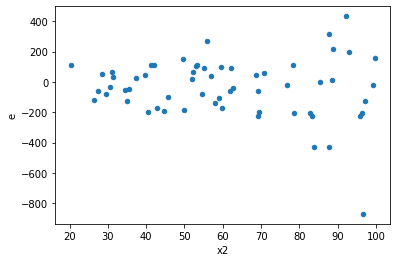

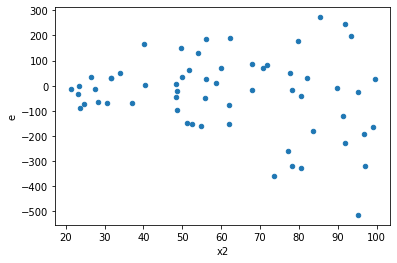

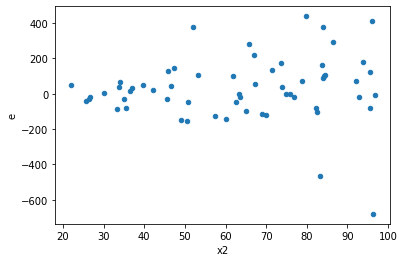

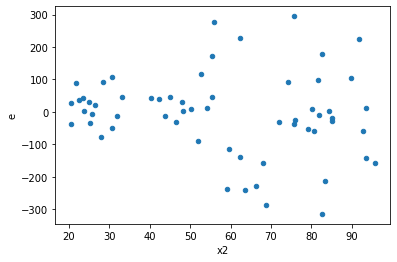

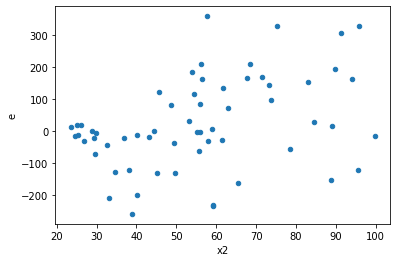

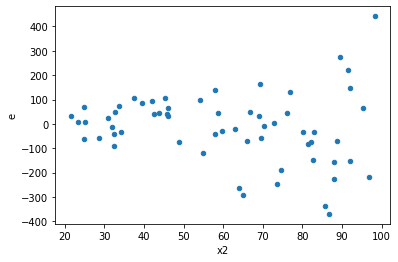

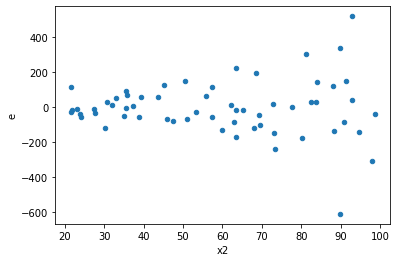

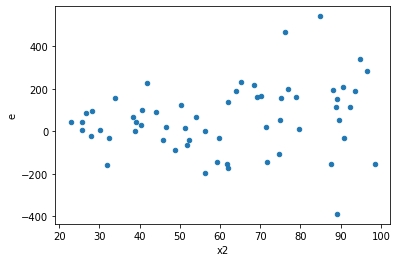

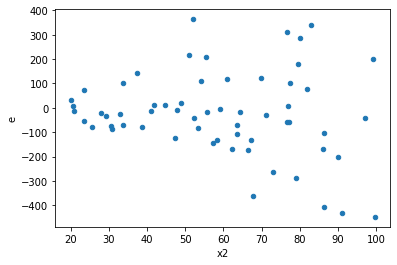

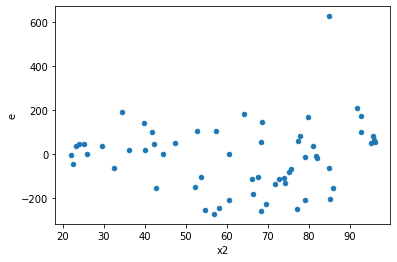

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,35.0,17.0,604897.8887493607,1386772.870609561,17282.796821410306,81574.87474173888,4.720004266941456,0.001280583301037419,0.9993597083494813,0.0006402916505187095,Reject001=0 : Heteroscedasticity
3.0,14.0,38.0,160256.34484275477,614312.9070154355,11446.881774482483,16166.129131985144,1.4122736174337767,0.3896802243170381,0.805159887841481,0.19484011215851904,Reject001=1 : Homoscedasticity
9.0,32.0,20.0,574248.9019797159,757260.1109568411,17945.278186866122,37863.005547842055,2.1099146613148307,0.08283489057786997,0.958582554711065,0.041417445288934984,Reject001=1 : Homoscedasticity
11.0,36.0,16.0,435597.6978384222,585260.5465562928,12099.936051067283,36578.7841597683,3.0230559901630096,0.020793909644654773,0.9896030451776726,0.010396954822327387,Reject001=1 : Homoscedasticity
12.0,20.0,32.0,305315.7531696483,490688.3948235367,15265.787658482415,15334.012338235521,1.0044691228044953,0.9663873233108031,0.5168063383445984,0.48319366165540156,Reject001=1 : Homoscedasticity
14.0,27.0,25.0,443955.92213302606,926040.0039816139,16442.81193085282,37041.600159264555,2.2527533803242474,0.04471964380384996,0.977640178098075,0.02235982190192498,Reject001=1 : Homoscedasticity
17.0,33.0,19.0,292838.8358286717,738398.2084001115,8873.904116020354,38863.06360000587,4.379477521043426,0.0012597853016935723,0.9993701073491532,0.0006298926508467861,Reject001=0 : Heteroscedasticity
18.0,24.0,28.0,183927.12869062755,1115203.7971214154,7663.630362109481,39828.70704005055,5.197107005182769,5.542446306483484e-05,0.9999722877684676,2.771223153241742e-05,Reject001=0 : Heteroscedasticity
19.0,35.0,17.0,661060.8883724869,332946.96103318123,18887.453953499626,19585.115354893012,1.036937821429559,0.9703460130100416,0.5148269934949792,0.4851730065050208,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,35.0,17.0,604897.8887493607,1386772.870609561,17282.796821410306,81574.87474173888,4.720004266941456,0.001280583301037419,Reject001=0 : Heteroscedasticity
1.0,20.0,32.0,693632.9939315602,493034.8404415827,34681.64969657801,15407.33876379946,0.4442504580547586,0.06014282414965707,Reject001=1 : Homoscedasticity
2.0,23.0,29.0,1387170.4341413474,435296.2331933174,60311.75800614554,15010.2149377006,0.2488770918627694,0.001077296343261956,Reject001=0 : Heteroscedasticity
3.0,14.0,38.0,160256.34484275477,614312.9070154355,11446.881774482483,16166.129131985144,1.4122736174337767,0.3896802243170381,Reject001=1 : Homoscedasticity
4.0,12.0,40.0,312346.4204353712,578292.2590589593,26028.86836961427,14457.306476473983,0.555433539068154,0.27240039458087134,Reject001=1 : Homoscedasticity
5.0,28.0,24.0,710437.8205417558,384181.3593192599,25372.779305062704,16007.556638302494,0.6308948832857447,0.2413822365168165,Reject001=1 : Homoscedasticity
6.0,25.0,27.0,771282.7457313779,518931.130972082,30851.309829255115,19219.67151748452,0.6229774886011239,0.2379712549393172,Reject001=1 : Homoscedasticity
7.0,31.0,21.0,1054633.4596890532,239760.01699870947,34020.43418351785,11417.143666605212,0.3355966477387454,0.005779480233916928,Reject001=0 : Heteroscedasticity
8.0,32.0,20.0,929563.8909679801,480704.78253996314,29048.87159274938,24035.239126998156,0.8274069803454042,0.6173319837624723,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      772
Reject001=0 : Heteroscedasticity    228
Name: Result_test, dtype: int64